# Introduction to Data Wrangling

In [1]:
library(tidyverse) 
library(dslabs)
path <- system.file("extdata", package="dslabs")
filename <- file.path(path, "fertility-two-countries-example.csv")
wide_data <- read_csv(filename)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  3.0.1     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'dslabs' was built under R version 3.6.3"Parsed with column specification:
cols(
  .default = col_double(),
  country = col_character()
)
See spec(...) for full column specifications.


country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Germany,2.41,2.44,2.47,2.49,2.49,2.48,2.44,2.37,2.28,...,1.36,1.36,1.37,1.38,1.39,1.40,1.41,1.42,1.43,1.44
South Korea,6.16,5.99,5.79,5.57,5.36,5.16,4.99,4.85,4.73,...,1.20,1.21,1.23,1.25,1.27,1.29,1.30,1.32,1.34,1.36


In [3]:
#gather
new_tidy_data <- gather(wide_data, key = 'year', value='fertility', `1960`:`2015`)

In [4]:
new_tidy_data %>% head

country,year,fertility
<chr>,<chr>,<dbl>
Germany,1960,2.41
South Korea,1960,6.16
Germany,1961,2.44
South Korea,1961,5.99
Germany,1962,2.47
South Korea,1962,5.79


In [5]:
data("gapminder")
tidy_data <- gapminder %>% 
  filter(country %in% c("South Korea", "Germany") & !is.na(fertility)) %>%
  select(country, year, fertility)

In [6]:
class(tidy_data$year)
#> [1] "integer"
class(new_tidy_data$year)
#> [1] "character"

[1] "integer"

[1] "character"

In [7]:
# The gather function assumes that column names are characters. 
# so we need to convert it
new_tidy_data <- wide_data %>%
  gather(year, fertility, -country, convert = TRUE)
class(new_tidy_data$year)

[1] "integer"

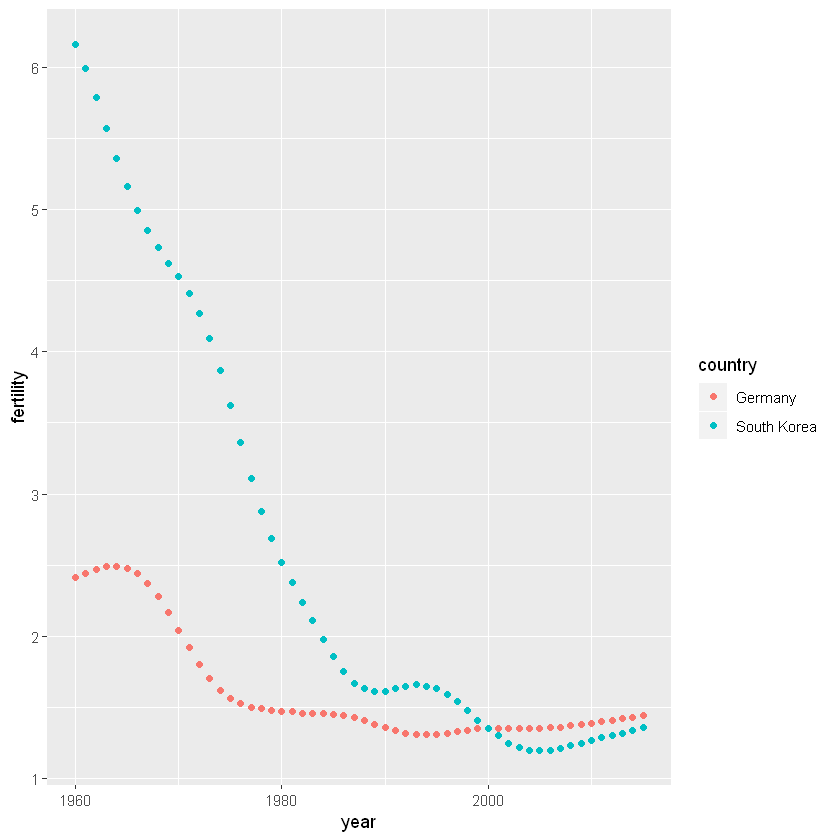

In [9]:
# now data is tidy
new_tidy_data %>% ggplot(aes(year, fertility, color = country)) + 
  geom_point()

In [11]:
# spread
new_tidy_data %>% head

country,year,fertility
<chr>,<int>,<dbl>
Germany,1960,2.41
South Korea,1960,6.16
Germany,1961,2.44
South Korea,1961,5.99
Germany,1962,2.47
South Korea,1962,5.79


In [13]:
new_wide_data <- new_tidy_data %>% spread(key = year, value=fertility)

In [14]:
new_wide_data %>% head

country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Germany,2.41,2.44,2.47,2.49,2.49,2.48,2.44,2.37,2.28,...,1.36,1.36,1.37,1.38,1.39,1.40,1.41,1.42,1.43,1.44
South Korea,6.16,5.99,5.79,5.57,5.36,5.16,4.99,4.85,4.73,...,1.20,1.21,1.23,1.25,1.27,1.29,1.30,1.32,1.34,1.36


In [16]:
#separate

In [17]:
path <- system.file("extdata", package = "dslabs")

filename <- "life-expectancy-and-fertility-two-countries-example.csv"
filename <-  file.path(path, filename)

raw_dat <- read_csv(filename)
select(raw_dat, 1:5)

Parsed with column specification:
cols(
  .default = col_double(),
  country = col_character()
)
See spec(...) for full column specifications.


country,1960_fertility,1960_life_expectancy,1961_fertility,1961_life_expectancy
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Germany,2.41,69.26,2.44,69.85
South Korea,6.16,53.02,5.99,53.75


In [35]:
#above date is in wideformat, 
dat <- raw_dat %>% gather(key = 'key', value = 'value', -country)
head(dat)

country,key,value
<chr>,<chr>,<dbl>
Germany,1960_fertility,2.41
South Korea,1960_fertility,6.16
Germany,1960_life_expectancy,69.26
South Korea,1960_life_expectancy,53.02
Germany,1961_fertility,2.44
South Korea,1961_fertility,5.99


In [36]:
dat %>% separate(col=key, into = c("year", "variable_name"), sep="_") %>% head

Warning message:
"Expected 2 pieces. Additional pieces discarded in 112 rows [3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 23, 24, 27, 28, 31, 32, 35, 36, 39, 40, ...]."

country,year,variable_name,value
<chr>,<chr>,<chr>,<dbl>
Germany,1960,fertility,2.41
South Korea,1960,fertility,6.16
Germany,1960,life,69.26
South Korea,1960,life,53.02
Germany,1961,fertility,2.44
South Korea,1961,fertility,5.99


In [37]:
# the function does separate the values, but we run into a new problem. We receive the warning Too many values at 112 locations: 
# and that the life_expectancy variable is truncated to life

In [38]:
# We could add a third column to catch this and let the separate function know which column to fill in with missing values, NA, 
# when there is no third value.

In [39]:
var_names <- c("year", "first_variable_name", "second_variable_name")
dat %>% separate(col = key, into = var_names, fill = "right") %>% head

country,year,first_variable_name,second_variable_name,value
<chr>,<chr>,<chr>,<chr>,<dbl>
Germany,1960,fertility,NA,2.41
South Korea,1960,fertility,NA,6.16
Germany,1960,life,expectancy,69.26
South Korea,1960,life,expectancy,53.02
Germany,1961,fertility,NA,2.44
South Korea,1961,fertility,NA,5.99


In [40]:
# However, if we read the separate help file, 
# we find that a better approach is to merge the last two variables when there is an extra separatio

In [41]:
dat %>% separate(key, c("year", "variable_name"), extra = "merge") %>% head #better
#still we not done, we need to create column for each variable, fertility and life expectancy in this case

country,year,variable_name,value
<chr>,<chr>,<chr>,<dbl>
Germany,1960,fertility,2.41
South Korea,1960,fertility,6.16
Germany,1960,life_expectancy,69.26
South Korea,1960,life_expectancy,53.02
Germany,1961,fertility,2.44
South Korea,1961,fertility,5.99


In [42]:
dat %>% separate(key, c("year", "variable_name"), extra = "merge") %>% spread(key = 'variable_name', value = 'value') %>% head

country,year,fertility,life_expectancy
<chr>,<chr>,<dbl>,<dbl>
Germany,1960,2.41,69.26
Germany,1961,2.44,69.85
Germany,1962,2.47,70.01
Germany,1963,2.49,70.10
Germany,1964,2.49,70.66
Germany,1965,2.48,70.65


In [43]:
# unite
# inverse of separate

In [46]:
dat %>% 
  separate(col = key, into = var_names, fill = "right") %>% head

country,year,first_variable_name,second_variable_name,value
<chr>,<chr>,<chr>,<chr>,<dbl>
Germany,1960,fertility,NA,2.41
South Korea,1960,fertility,NA,6.16
Germany,1960,life,expectancy,69.26
South Korea,1960,life,expectancy,53.02
Germany,1961,fertility,NA,2.44
South Korea,1961,fertility,NA,5.99


In [50]:
dat %>% 
  separate(col = key, into = var_names, fill = "right") %>%
  unite(variable_name, first_variable_name, second_variable_name) %>%
  spread(key = variable_name, value = value) %>%
  rename(fertility = fertility_NA) %>% head

country,year,fertility,life_expectancy
<chr>,<chr>,<dbl>,<dbl>
Germany,1960,2.41,69.26
Germany,1961,2.44,69.85
Germany,1962,2.47,70.01
Germany,1963,2.49,70.10
Germany,1964,2.49,70.66
Germany,1965,2.48,70.65
